# **Predict mushrooms are edible or not**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
csv_file_path = '/content/drive/MyDrive/DATA/mushrooms.csv'

df = pd.read_csv(csv_file_path)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<Axes: xlabel='class', ylabel='count'>

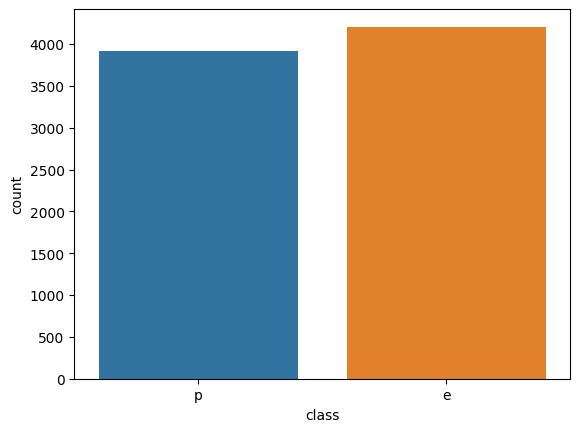

In [7]:
# check if the target column has overfitting data
sns.countplot(data=df, x="class")

In [8]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'veil-type'),
  Text(1, 0, 'class'),
  Text(2, 0, 'bruises'),
  Text(3, 0, 'gill-attachment'),
  Text(4, 0, 'gill-spacing'),
  Text(5, 0, 'gill-size'),
  Text(6, 0, 'stalk-shape'),
  Text(7, 0, 'ring-number'),
  Text(8, 0, 'cap-surface'),
  Text(9, 0, 'veil-color'),
  Text(10, 0, 'stalk-surface-below-ring'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'ring-type'),
  Text(13, 0, 'stalk-root'),
  Text(14, 0, 'cap-shape'),
  Text(15, 0, 'population'),
  Text(16, 0, 'habitat'),
  Text(17, 0, 'stalk-color-above-ring'),
  Text(18, 0, 'stalk-color-below-ring'),
  Text(19, 0, 'odor'),
  Text(20, 0, 'spore-print-color'),
  Text(21, 0, 'cap-color'),
  Text(22, 0, 'gill-color')])

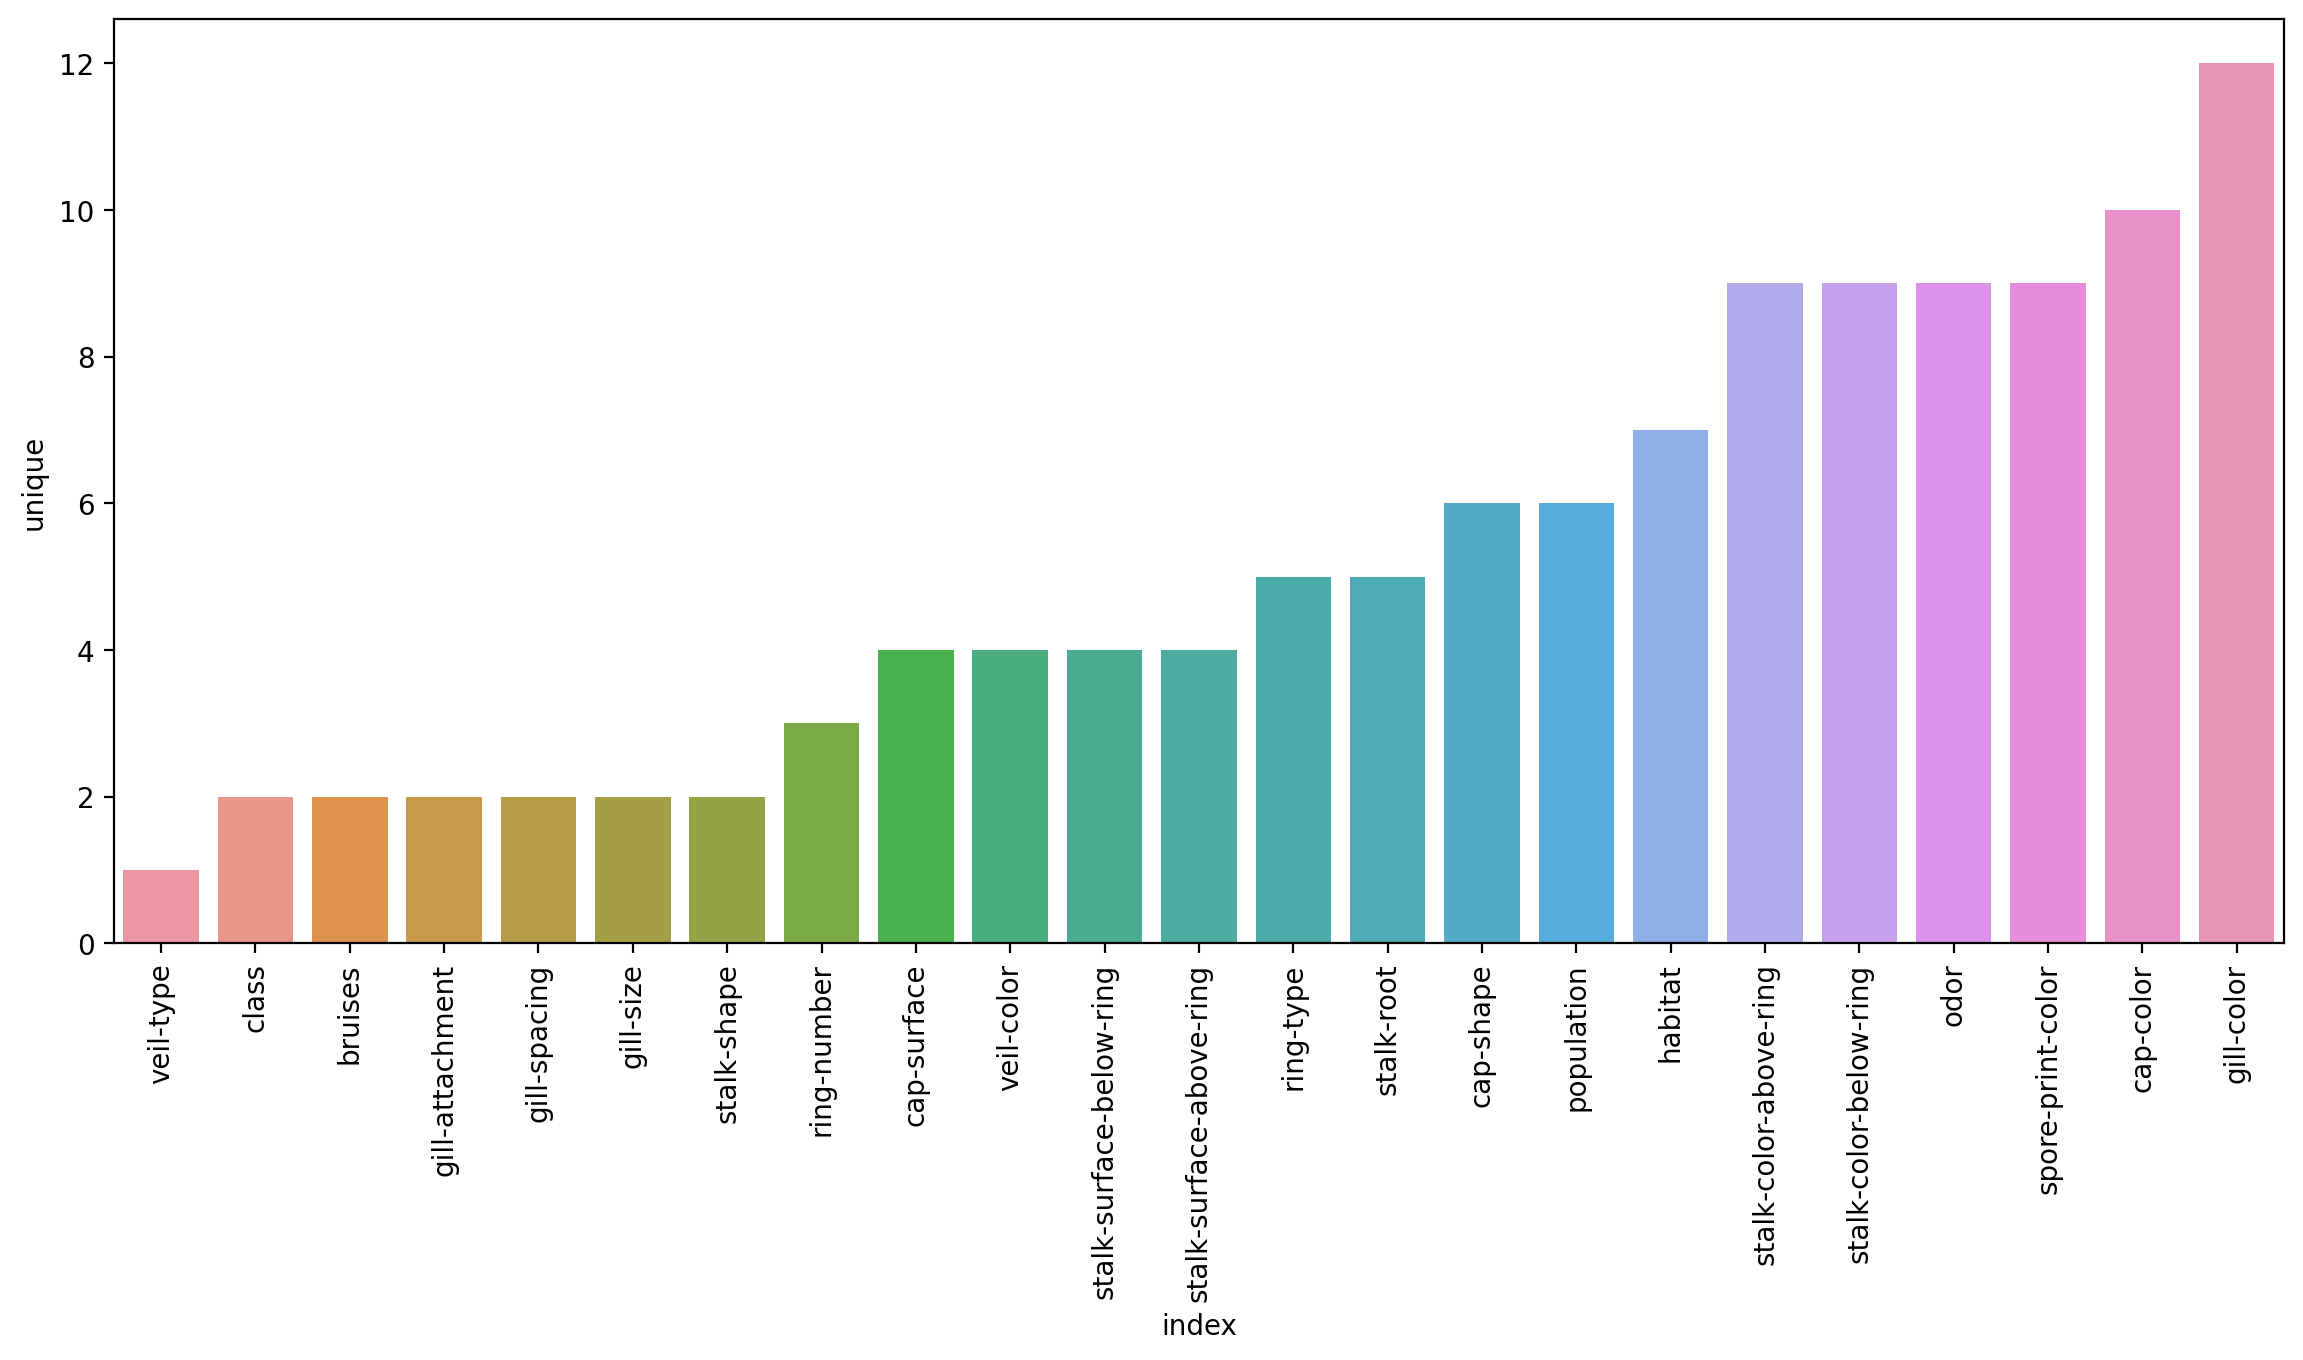

In [9]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=feat_uni, x="index",y="unique")
plt.xticks(rotation=90)

In [10]:
X = df.drop('class',axis=1)


In [11]:
X = pd.get_dummies(X,drop_first=True)

In [12]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [13]:
y = df['class']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [16]:
from sklearn.ensemble import AdaBoostClassifier


In [17]:
model = AdaBoostClassifier(n_estimators=1) # here model has only single stump on 1 feature (that is we had to chosse the mushroom using only one feature from the all feature )

In [18]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [19]:
from sklearn.metrics import classification_report, accuracy_score

In [20]:
predictions = model.predict(X_test)

In [21]:
predictions

array(['e', 'p', 'p', ..., 'e', 'e', 'e'], dtype=object)

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.79      0.87      1378
           p       0.82      0.97      0.89      1303

    accuracy                           0.88      2681
   macro avg       0.89      0.88      0.88      2681
weighted avg       0.89      0.88      0.88      2681



In [23]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
model.feature_importances_.argmax()

22

In [25]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

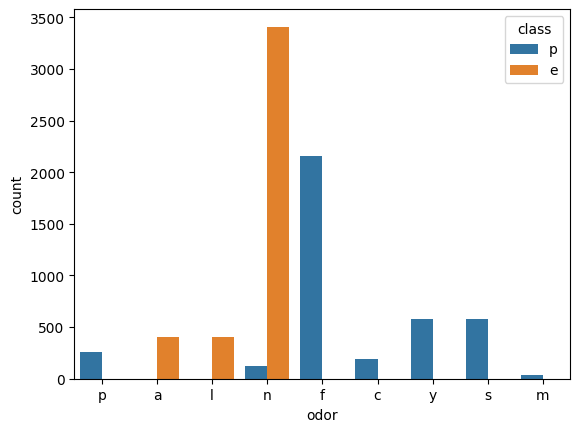

In [26]:
sns.countplot(data=df,x="odor",hue='class')

In [27]:
len(X.columns)

95

In [28]:
# check no of estimator which can give better results
error_rates = []

for n in range(1,96):
  model = AdaBoostClassifier(n_estimators= n)
  model.fit(X_train,y_train)
  preds = model.predict(X_test)

  err = 1 - accuracy_score(y_test, preds)

  error_rates.append(err)


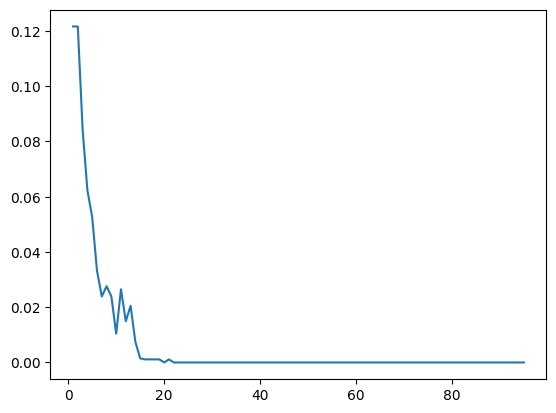

In [29]:
plt.plot(range(1,96), error_rates)

In [30]:
feats = pd.DataFrame(index = X.columns, data = model.feature_importances_ , columns= ['Importance'] )

In [31]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.021053
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [32]:
imp_feats = feats[feats['Importance'] >0 ]

In [33]:
imp_feats

,Importance
cap-color_c,0.010526
cap-color_n,0.021053
cap-color_w,0.021053
bruises_t,0.021053
odor_c,0.031579
odor_f,0.031579
odor_n,0.042105
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.084211


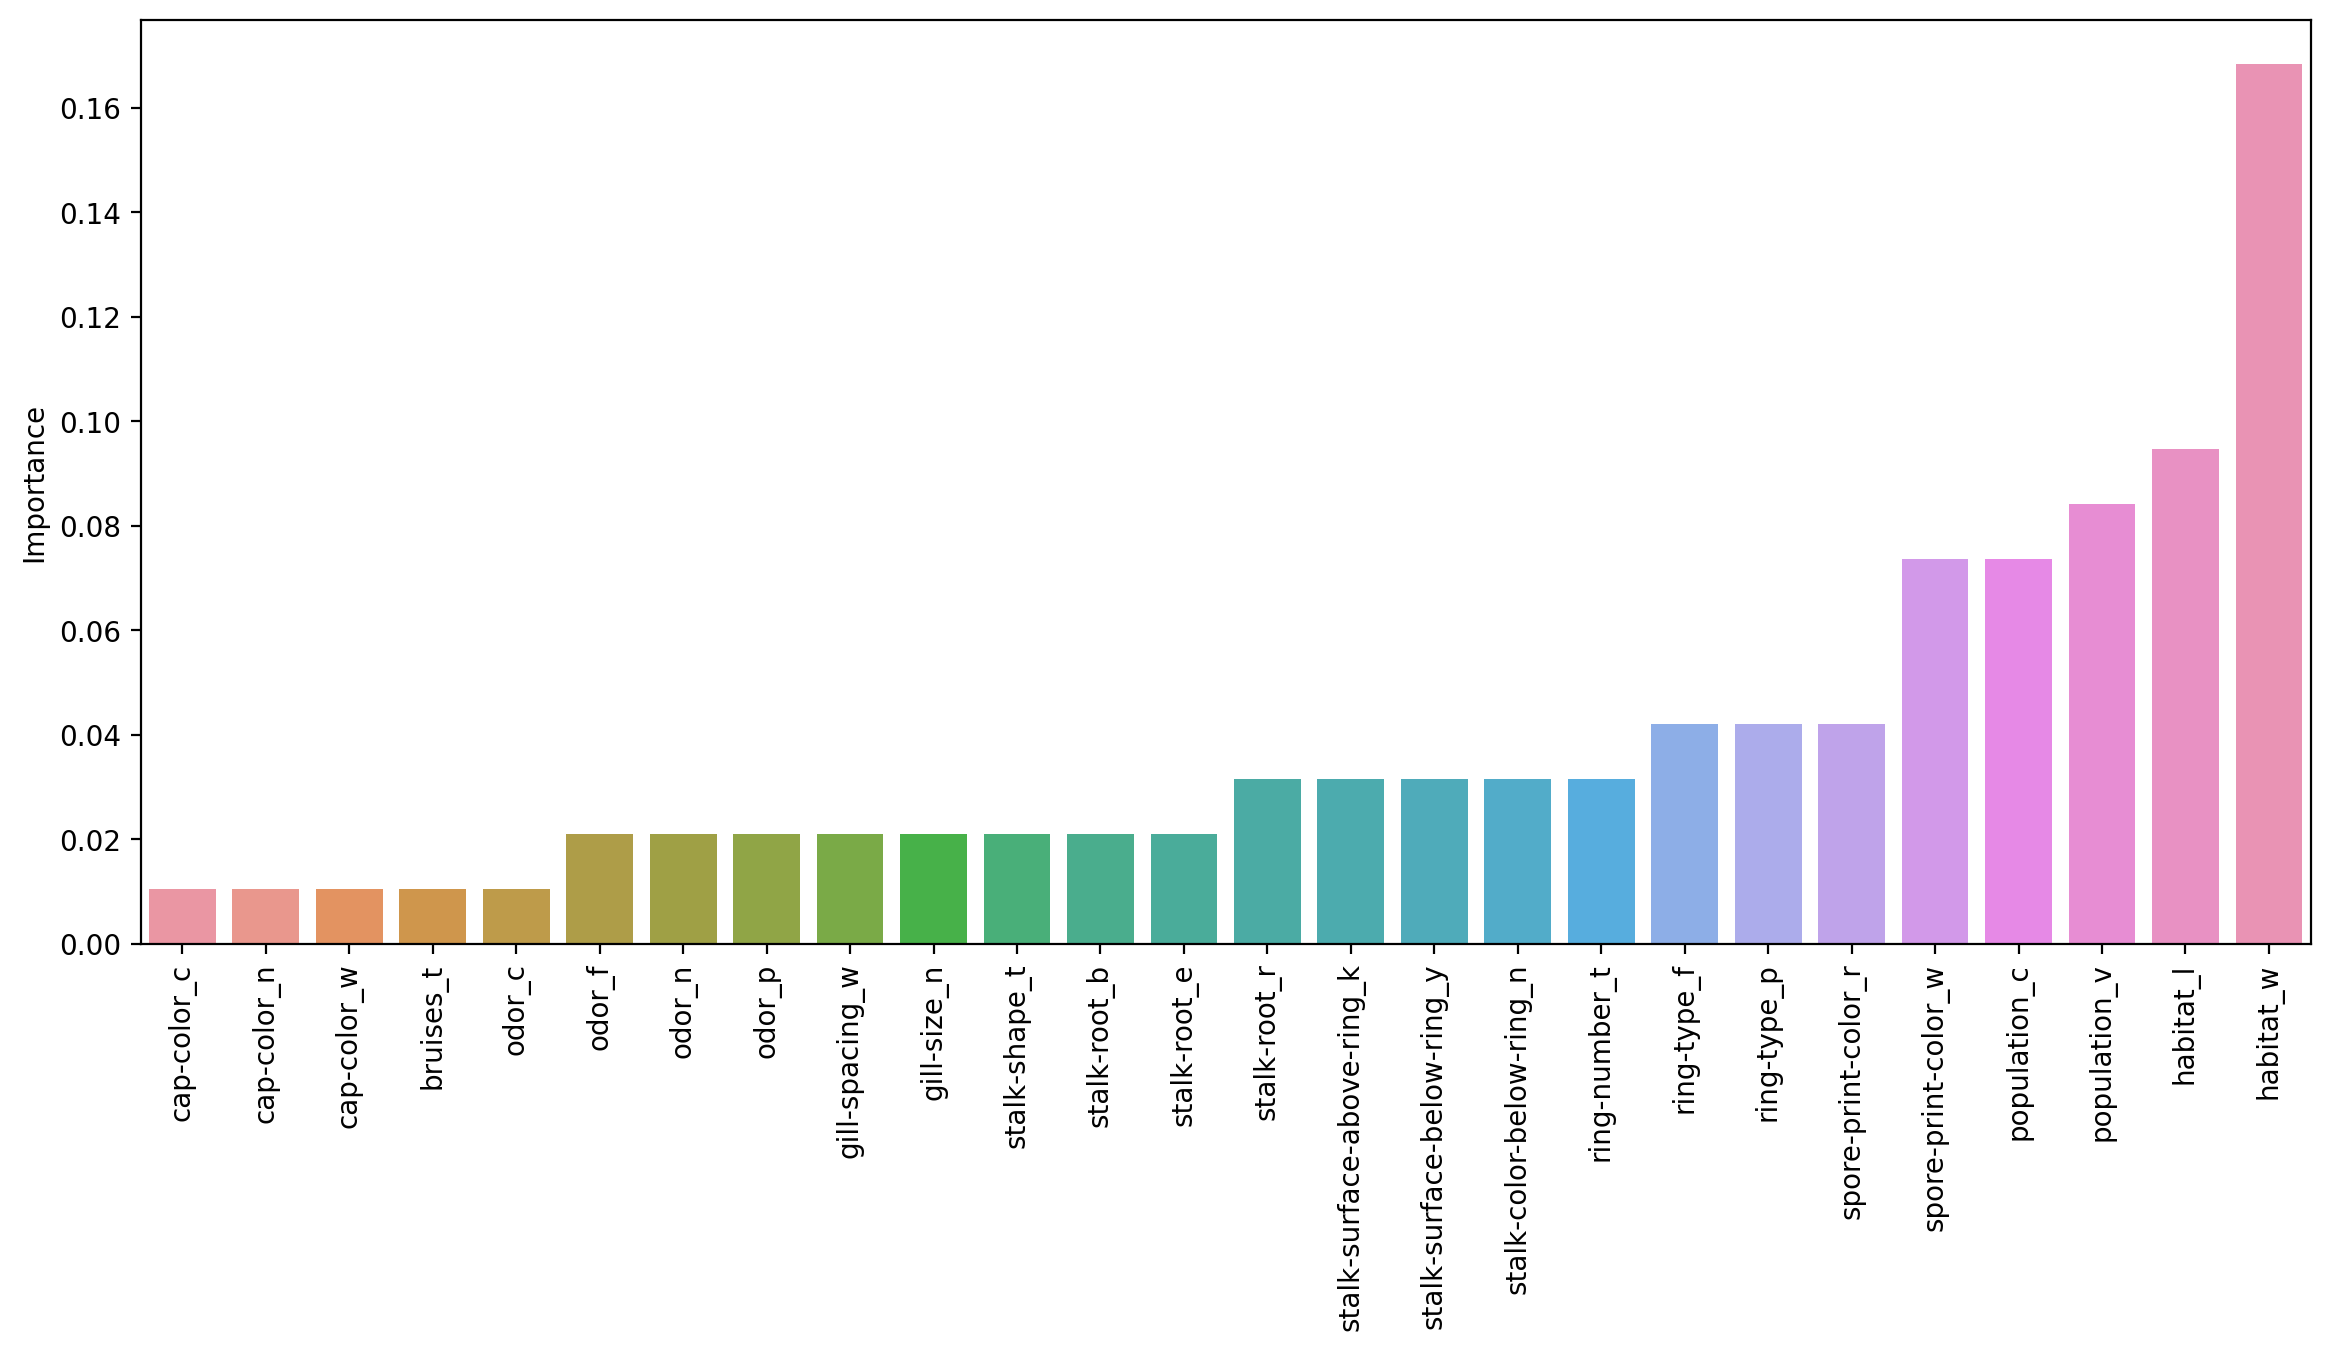

In [34]:
plt.figure(figsize=(14,6) ,dpi=200)
sns.barplot(data=imp_feats.sort_values("Importance"), x= imp_feats.index, y='Importance')
plt.xticks(rotation=90);

In [35]:
# lets check model around 25 featurea
model = AdaBoostClassifier(n_estimators= 25)

In [36]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=25)

In [37]:
predictions1 = model.predict(X_test)

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.79      0.87      1378
           p       0.82      0.97      0.89      1303

    accuracy                           0.88      2681
   macro avg       0.89      0.88      0.88      2681
weighted avg       0.89      0.88      0.88      2681



# Gradient Boost

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'n_estimators': [50,100],
              'learning_rate':[0.1,0.05,0.2],
              'max_depth': [3,4,5]}

In [42]:
gbclassifier = GradientBoostingClassifier()

In [43]:
grid = GridSearchCV(gbclassifier,param_grid)

In [44]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [45]:
pred = grid.predict(X_test)

In [46]:
pred

array(['e', 'p', 'p', ..., 'e', 'e', 'e'], dtype=object)

In [47]:
grid.best_estimator_

GradientBoostingClassifier()

In [48]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1378
           p       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [50]:
grid.best_estimator_.feature_importances_

array([6.45406923e-04, 6.91250664e-17, 0.00000000e+00, 0.00000000e+00,
       3.55412716e-17, 7.56086185e-04, 0.00000000e+00, 1.10374214e-16,
       1.51506038e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.95896487e-16, 0.00000000e+00, 2.56573019e-18, 9.21537428e-05,
       4.89612345e-03, 5.18464886e-02, 3.64133854e-04, 2.02746116e-02,
       1.58037454e-02, 5.74413360e-03, 6.22563809e-01, 6.04565524e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.21179574e-02,
       9.41066889e-03, 0.00000000e+00, 1.34729155e-17, 6.99211261e-18,
       0.00000000e+00, 4.50460517e-17, 0.00000000e+00, 6.64583383e-18,
       1.60322066e-16, 1.83167642e-18, 4.73331208e-17, 1.26074570e-18,
       5.06306573e-04, 2.88583260e-06, 1.31786283e-01, 2.87365880e-03,
       3.02404320e-02, 1.99854699e-03, 0.00000000e+00, 9.84419466e-06,
       0.00000000e+00, 0.00000000e+00, 3.24363509e-02, 1.48300772e-03,
       0.00000000e+00, 0.00000000e+00, 1.16894199e-06, 0.00000000e+00,
      

In [51]:
feat_import  = grid.best_estimator_.feature_importances_

In [52]:
imp_feat = pd.DataFrame(index=X.columns, data= feat_import, columns=['Importance'])

In [53]:
imp_feat =  imp_feat[imp_feat['Importance'] > 0.0005]

In [54]:
imp_feat = imp_feat.sort_values('Importance')

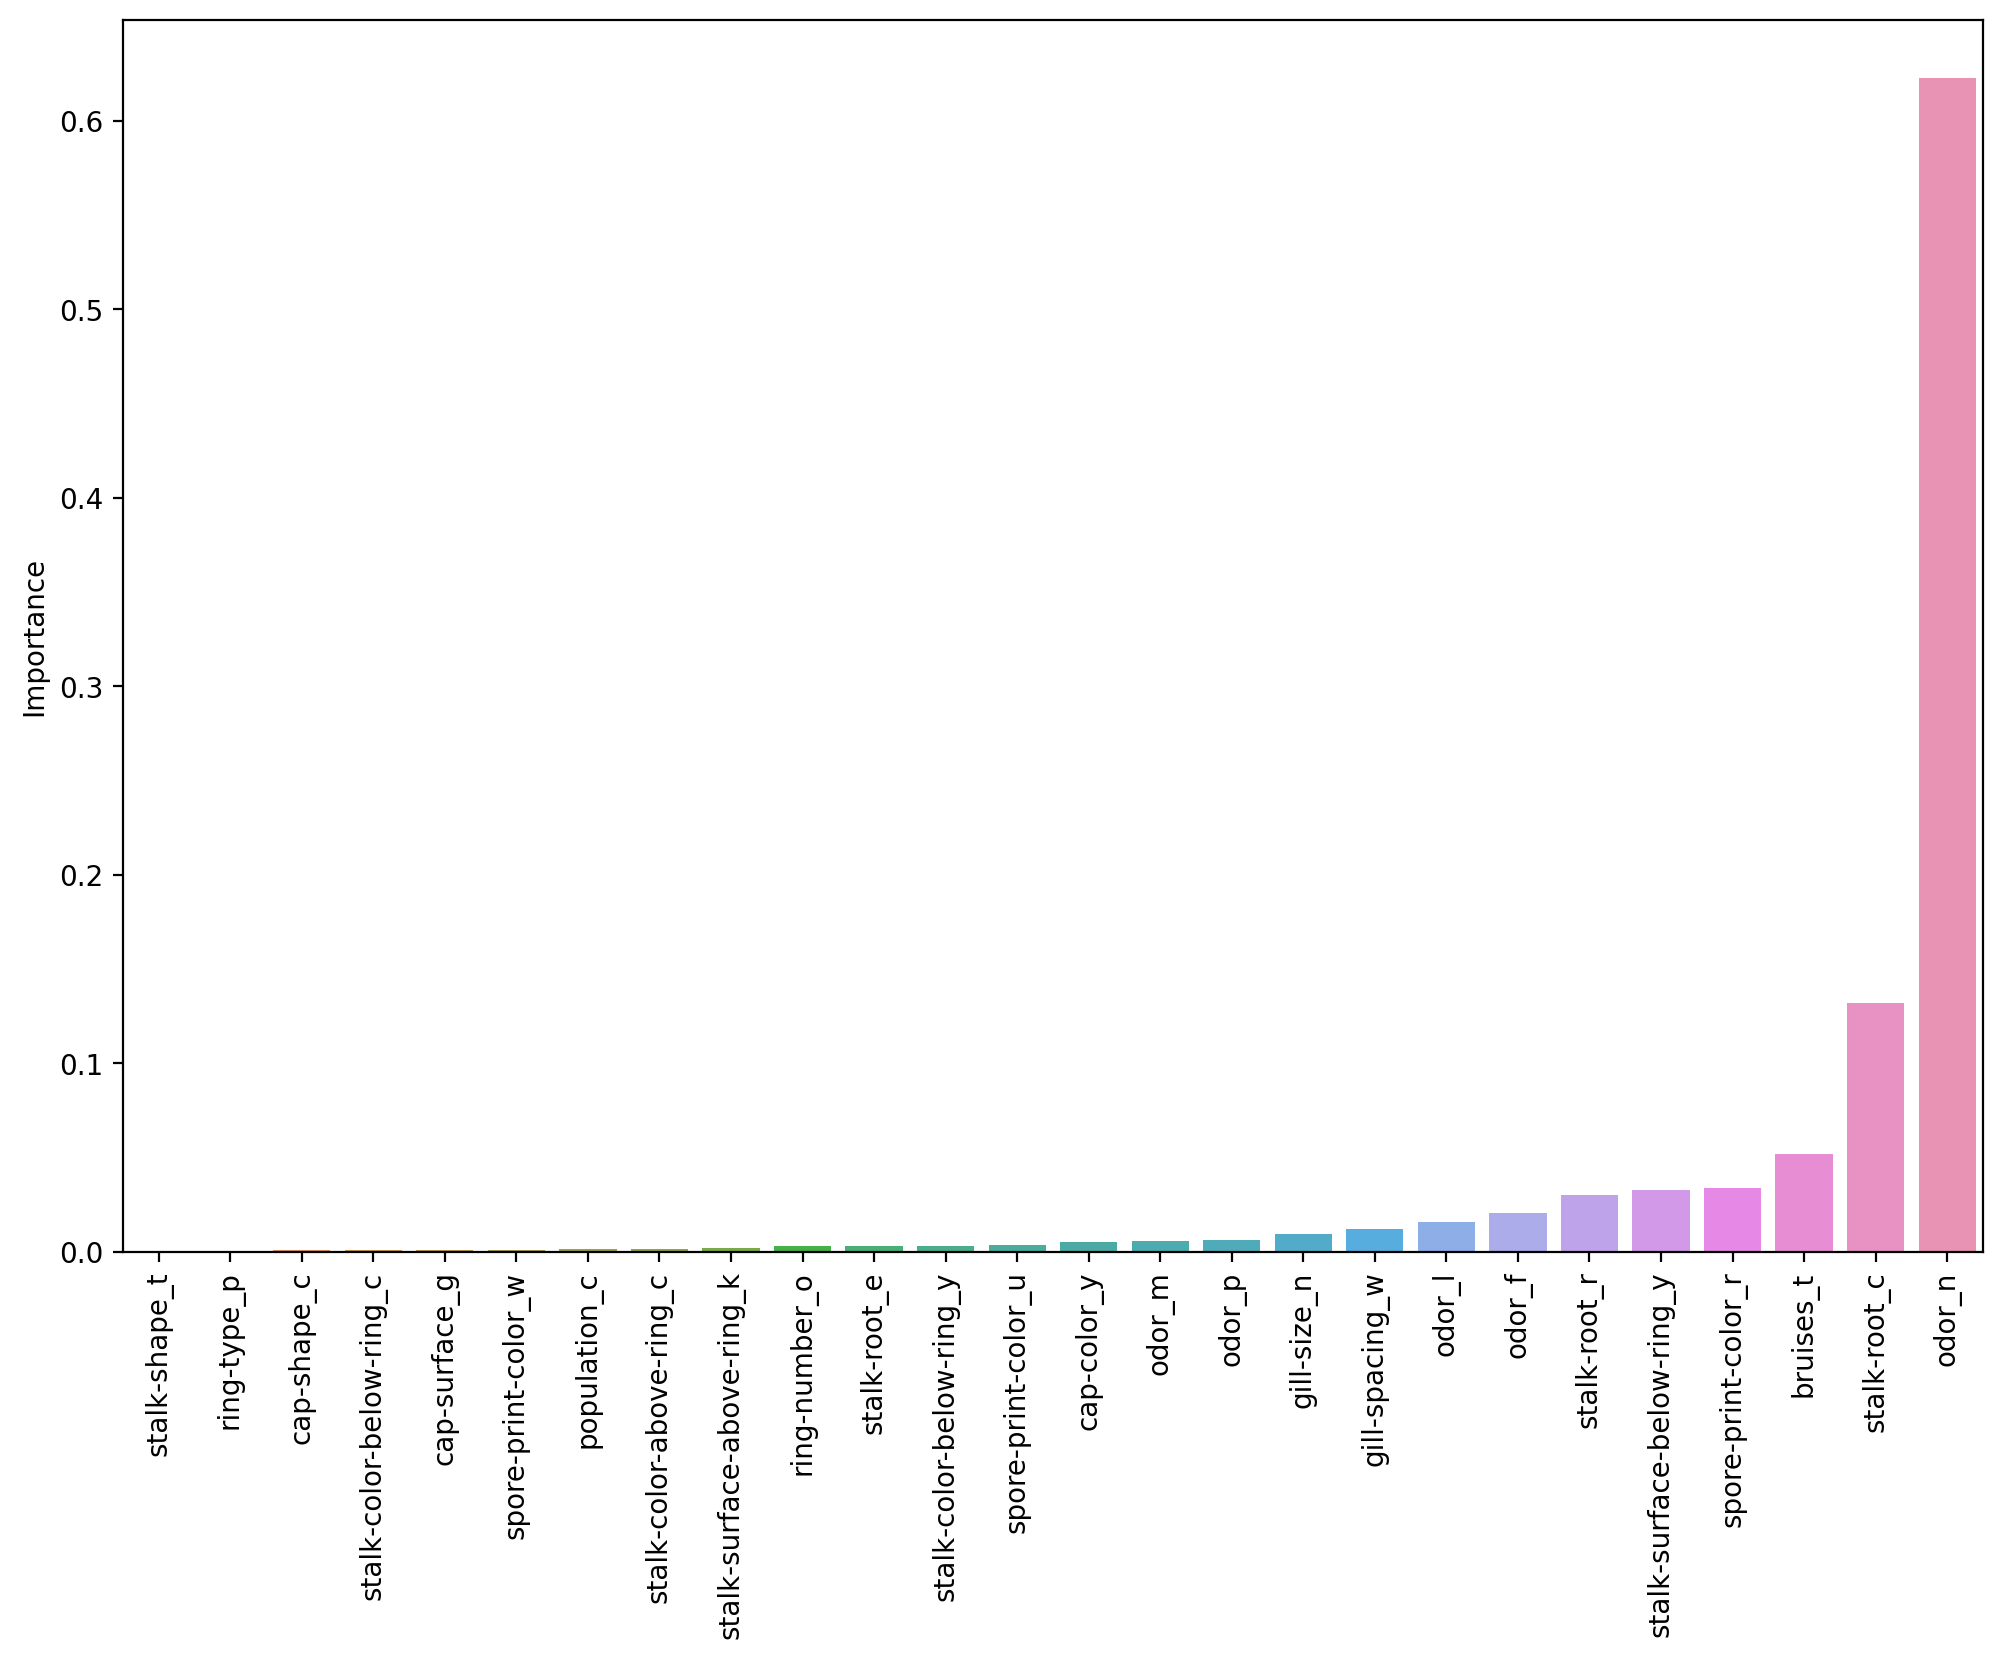

In [55]:
plt.figure(figsize=(12,8), dpi = 200)
sns.barplot(data=imp_feat, x=imp_feat.index, y='Importance')
plt.xticks(rotation=90);

KeyError: ignored